DOMAIN: Sports management <br>
CONTEXT: Company X is a sports management company for international cricket.<br>
PROJECT OBJECTIVE: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

In [1]:
#import libraries that will be used for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [2]:
cricket = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [3]:
cricket.head()
# we can see that there are entire null rows in the data set

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cricket.shape
# shape of the dataset

(180, 7)

In [5]:
cricket.info()
# clearly we have 90 non null records in each feature out of total 180 records
# looking at the head, we can say hat every alternate record is a null record

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


In [6]:
cricket.isnull().sum()
# we can confirm that there are 90 null records and 90 non null records by lookin gat above and below values

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [7]:
cricket.dropna(axis=0, inplace = True)
#lets drop the null records 

In [8]:
cricket.shape
#rechecking the shape of the data set

(90, 7)

In [9]:
cricket.info()
#recheck the head to find if we have any null values, clearly all the null records are now dropped and we have 
# data set ready for further EDA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [10]:
cricket.describe().T
# we can see that that almost all the columns have outliers since max value is much higher than 75% of the data

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


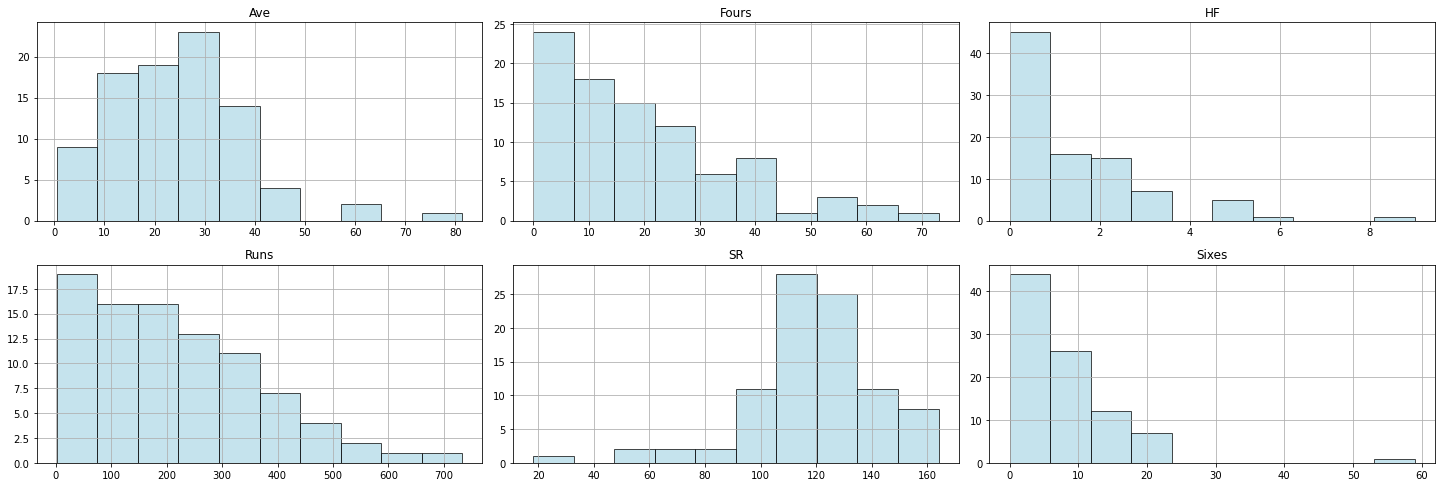

In [11]:
#Lets check the distribution of each feature
cricket.hist(color='lightblue', edgecolor = 'black', alpha = 0.7, figsize = (20,10), layout=(3,3))
plt.tight_layout()
plt.show()
#we can see that distribution is not at all normal for all columns

In [12]:
cricket.skew()
# We can see that except for Runs all the other columns are highly skewed

Runs     0.754618
Ave      1.038076
SR      -1.166175
Fours    1.107192
Sixes    3.226595
HF       2.001199
dtype: float64

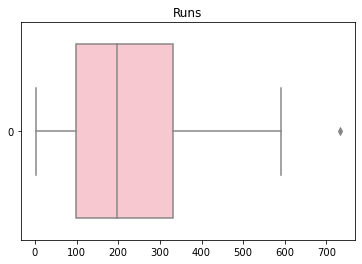

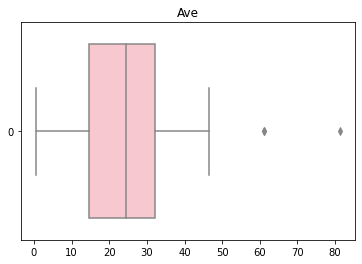

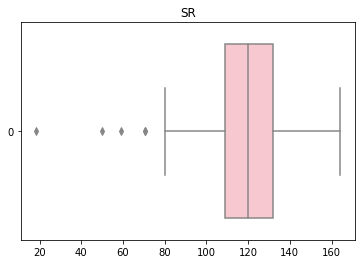

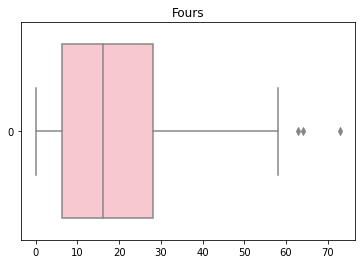

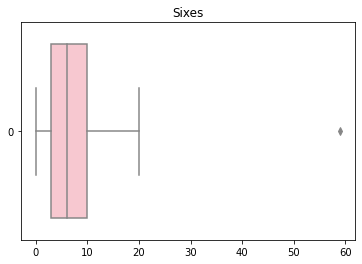

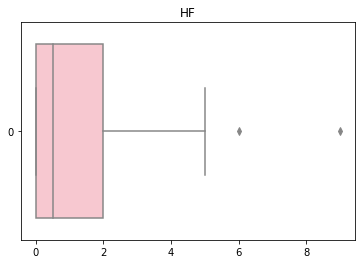

In [13]:
#Lets check for the outliers in teh dataset
for columns in cricket.columns[1:7]:
    plt.figure()
    plt.title(columns)
    sns.boxplot(data = cricket[columns].values, orient="h" , color = 'pink')

# we can see that all columns have presence of outliers, sinceour objective is to rank the batsman
# we will require the the extrem values to score the batsman

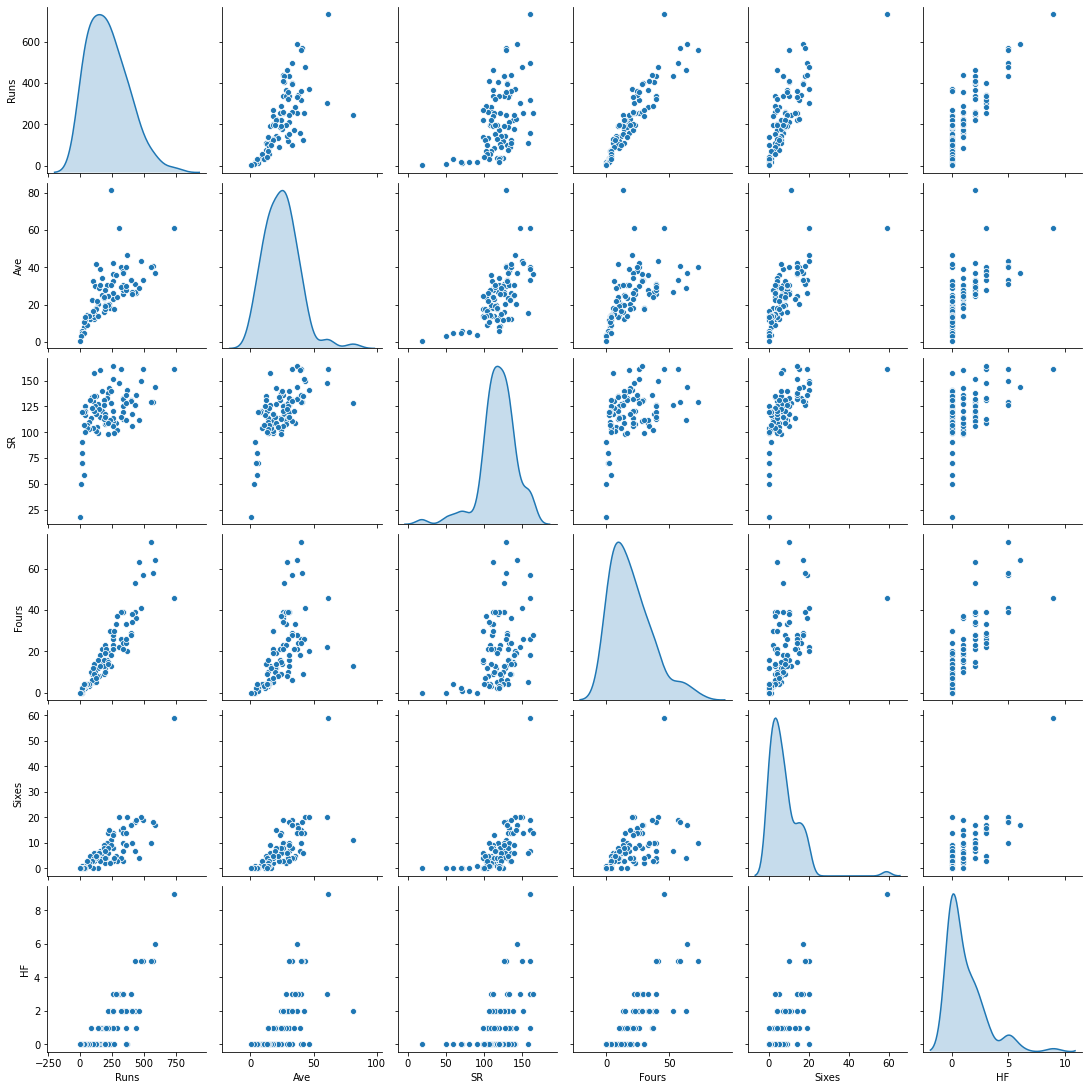

In [14]:
# Lets check the correlation of each column
sns.pairplot(cricket, diag_kind = 'kde')
# we can see that almost all the columns support each other positively and there is no negative slope or correlation 

In [15]:
cricket.corr()
# We can see from below that our data set is pretty much real where in,
# runs is positively correlated with all the other features, meaning if the Batsman scores more run he is likely to have 
# better Average, Strike rate, Fours, Sixes and half century
# similarly, if the Bats man hits half century, he will likely to have good numbers on runs, average, SR, fours and sixes.

,Runs,Ave,SR,Fours,Sixes,HF
Runs,1.000000,0.692984,0.493489,0.918809,0.769778,0.835148
Ave,0.692984,1.000000,0.623606,0.546211,0.682414,0.620754
SR,0.493489,0.623606,1.000000,0.384810,0.583943,0.427584
Fours,0.918809,0.546211,0.384810,1.000000,0.522574,0.783689
Sixes,0.769778,0.682414,0.583943,0.522574,1.000000,0.767696
HF,0.835148,0.620754,0.427584,0.783689,0.767696,1.000000


Since all the column is a clear attribute of a good batsman, we should not neglect any of the columns<br>
we can assign each bats man a score  from 1 to 4 his performance on each column <br>
then find out the best one based on the total score earned by each batsman<br>
This way, batsman will be measured on each attribute like Runs, Average, Strike Rate, Fours, sixes and Half Centuries<br>

In [16]:
#Creating new dataframe for score calculation
temp = cricket.copy()
temp1 = cricket.copy()
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [28]:
# Calculating scores based on the performance of each player
for columns in temp.columns[1:7]:
    #find 1st, 2nd and 3rd quartile
    q1 = temp[columns].quantile(0.25)
    q2 = temp[columns].quantile(0.50)
    q3 = temp[columns].quantile(0.75)
    print("quartile values for", columns, "is",q1,q2,q3)
    
    #replace each value with score 1 to 5 based on below criteria
    temp.loc[(temp[columns].values < q1) , columns] = 0
    temp.loc[(temp[columns].values >= q1) & (temp[columns].values < q2) , columns] = 1
    temp.loc[(temp[columns].values >= q2) & (temp[columns].values <= q3) , columns] = 2
    temp.loc[(temp[columns].values > q3) , columns] = 4
    #Calculate the score
   

quartile values for Runs is 98.0 196.5 330.75
quartile values for Ave is 14.665 24.44 32.19499999999999
quartile values for SR is 108.745 120.13499999999999 131.9975
quartile values for Fours is 6.25 16.0 28.0
quartile values for Sixes is 3.0 6.0 10.0
quartile values for HF is 0.0 0.5 2.0


In [31]:
#temp.drop(labels = 'Score', axis = 1, inplace = True)
temp['Score'] = temp.sum(axis = 1)

In [32]:
# Take a look at the data
temp.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Score
1,CH Gayle,4.0,4.0,4.0,4.0,4.0,4.0,24.0
3,G Gambhir,4.0,4.0,4.0,4.0,4.0,4.0,24.0
5,V Sehwag,4.0,4.0,4.0,4.0,4.0,4.0,24.0
7,CL White,4.0,4.0,4.0,4.0,4.0,4.0,24.0
9,S Dhawan,4.0,4.0,2.0,4.0,4.0,4.0,22.0
11,AM Rahane,4.0,4.0,2.0,4.0,2.0,4.0,20.0
13,KP Pietersen,2.0,4.0,4.0,2.0,4.0,4.0,20.0
15,RG Sharma,4.0,2.0,2.0,4.0,4.0,4.0,20.0
17,AB de Villiers,2.0,4.0,4.0,2.0,4.0,4.0,20.0
19,JP Duminy,2.0,4.0,2.0,1.0,4.0,2.0,15.0


In [33]:
#Check the batsman with same scores
temp['Score'].value_counts()

2.0     11
20.0     9
9.0      9
15.0     7
10.0     7
14.0     6
12.0     5
8.0      5
3.0      5
16.0     4
24.0     4
5.0      4
6.0      4
22.0     3
7.0      2
18.0     2
4.0      2
13.0     1
Name: Score, dtype: int64

In [ ]:
#Lets find the most important feature before appending the score column to original data set


In [34]:
#Copy the score volumn to original dataset before assigning Ranks
cricket['Score'] = temp['Score']
cricket.head(20)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Score
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,24.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,24.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,24.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,24.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,22.0
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,20.0
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,20.0
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,20.0
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,20.0
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,15.0


In [35]:
#Sort the batsman with highest score and for the batsman with same score, 
# one with higher Average will preceed other  
cricket.sort_values(['Score','Ave'] ,ascending=[False,False], inplace= True)
cricket.head(20)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Score
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,24.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,24.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,24.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,24.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,22.0
27,OA Shah,340.0,37.77,132.81,24.0,16.0,3.0,22.0
25,F du Plessis,398.0,33.16,130.92,29.0,17.0,3.0,22.0
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,20.0
29,DJ Bravo,371.0,46.37,140.53,20.0,20.0,0.0,20.0
45,SPD Smith,362.0,40.22,135.58,24.0,14.0,0.0,20.0


In [36]:
#Assigning the Rank to all 90 Batsman
cricket['Rank'] = range(1,91)
cricket

,Name,Runs,Ave,SR,Fours,Sixes,HF,Score,Rank
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,24.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,24.0,2
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,24.0,3
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,24.0,4
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,22.0,5
27,OA Shah,340.0,37.77,132.81,24.0,16.0,3.0,22.0,6
25,F du Plessis,398.0,33.16,130.92,29.0,17.0,3.0,22.0,7
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,20.0,8
29,DJ Bravo,371.0,46.37,140.53,20.0,20.0,0.0,20.0,9
45,SPD Smith,362.0,40.22,135.58,24.0,14.0,0.0,20.0,10


In [17]:
from sklearn.decomposition import PCA


In [19]:
temp1.drop(labels ='Name', axis = 1, inplace = True)
XScaled  =temp1.apply(zscore)
XScaled.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


In [23]:
# Creating single dimension which will represent all the features using PCA technique
pca3 = PCA(n_components=1)
pca3.fit(XScaled)
print(pca3.components_) 
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[0.4582608  0.39797313 0.3253838  0.40574167 0.41733459 0.43237178]]
[0.70911996]


In [24]:
Xpca3

array([[ 8.51677407],
       [ 4.61833957],
       [ 4.1422505 ],
       [ 3.89941107],
       [ 4.12007165],
       [ 4.02443639],
       [ 2.87928084],
       [ 2.91901518],
       [ 2.3273886 ],
       [ 2.08164241],
       [ 2.08328069],
       [ 1.77694308],
       [ 2.12516667],
       [ 1.93887249],
       [ 1.72763623],
       [ 1.81713174],
       [ 1.86989515],
       [ 1.44931719],
       [ 1.7957849 ],
       [ 1.83452229],
       [ 0.68521512],
       [ 1.28111282],
       [ 1.23672458],
       [ 1.03374737],
       [ 1.38634619],
       [ 1.18109656],
       [ 0.68373376],
       [ 1.04356191],
       [ 1.02916835],
       [ 0.53160014],
       [ 0.87997561],
       [ 0.66964957],
       [ 1.09641905],
       [ 0.86013096],
       [ 0.32393465],
       [ 0.46475228],
       [ 0.25917713],
       [ 0.24998938],
       [-0.20115976],
       [-0.04807084],
       [ 0.0883086 ],
       [-0.36664347],
       [-0.35836507],
       [-0.56106199],
       [-0.38633634],
       [-0

In [25]:
temp1['Name'] = temp['Name']
temp1['PCA dimension'] = Xpca3
temp1.head()

,Runs,Ave,SR,Fours,Sixes,HF,Name,PCA dimension
1,733.0,61.08,160.74,46.0,59.0,9.0,CH Gayle,8.516774
3,590.0,36.87,143.55,64.0,17.0,6.0,G Gambhir,4.618340
5,495.0,33.00,161.23,57.0,19.0,5.0,V Sehwag,4.142251
7,479.0,43.54,149.68,41.0,20.0,5.0,CL White,3.899411
9,569.0,40.64,129.61,58.0,18.0,5.0,S Dhawan,4.120072


In [26]:
temp1.sort_values(['PCA dimension'] ,ascending=[False], inplace= True)
temp1.head(20)

,Runs,Ave,SR,Fours,Sixes,HF,Name,PCA dimension
1,733.0,61.08,160.74,46.0,59.0,9.0,CH Gayle,8.516774
3,590.0,36.87,143.55,64.0,17.0,6.0,G Gambhir,4.618340
5,495.0,33.00,161.23,57.0,19.0,5.0,V Sehwag,4.142251
9,569.0,40.64,129.61,58.0,18.0,5.0,S Dhawan,4.120072
11,560.0,40.00,129.33,73.0,10.0,5.0,AM Rahane,4.024436
7,479.0,43.54,149.68,41.0,20.0,5.0,CL White,3.899411
15,433.0,30.92,126.60,39.0,18.0,5.0,RG Sharma,2.919015
13,305.0,61.00,147.34,22.0,20.0,3.0,KP Pietersen,2.879281
17,319.0,39.87,161.11,26.0,15.0,3.0,AB de Villiers,2.327389
25,398.0,33.16,130.92,29.0,17.0,3.0,F du Plessis,2.125167


In [38]:
temp1['Rank'] = range(1,91)
temp1

,Runs,Ave,SR,Fours,Sixes,HF,Name,PCA dimension,Rank
1,733.0,61.08,160.74,46.0,59.0,9.0,CH Gayle,8.516774,1
3,590.0,36.87,143.55,64.0,17.0,6.0,G Gambhir,4.618340,2
5,495.0,33.00,161.23,57.0,19.0,5.0,V Sehwag,4.142251,3
9,569.0,40.64,129.61,58.0,18.0,5.0,S Dhawan,4.120072,4
11,560.0,40.00,129.33,73.0,10.0,5.0,AM Rahane,4.024436,5
7,479.0,43.54,149.68,41.0,20.0,5.0,CL White,3.899411,6
15,433.0,30.92,126.60,39.0,18.0,5.0,RG Sharma,2.919015,7
13,305.0,61.00,147.34,22.0,20.0,3.0,KP Pietersen,2.879281,8
17,319.0,39.87,161.11,26.0,15.0,3.0,AB de Villiers,2.327389,9
25,398.0,33.16,130.92,29.0,17.0,3.0,F du Plessis,2.125167,10


# PART 5

Question 1:
List down all possible dimensionality reduction techniques that can be implemented using python.
Answer:
1. Variance inflation factor method - Like name suggestes, Higher the VIF factor higher is the variance inflated due to collinearity, hence higher VIF dimension can be dropped
2. Low Varicance dimensions - Low variance dimensions are the one which will have almost same values across all the records, hence the variance for that particular column will be very low. In case of too many dimensions, this dimensions can be dropped.
3. Highly correlated dimensions - This dimension are highly correlated with other dimension,so they can be dropped since its purpose in predicting target variable can be served by other dimension.
4. Random Forest: This techniques tells us the importance of each feature present in the dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction
5. Principal Component Analysis: PCA is another technique where in from the Large dats set, we can get newly created dimensions called principal components. These principal components are derived from the entire data set all together and each new PC explains a certain amount of variance. Based on SME suggestions or elbow method, we can further select number of PC that we require for training our model.

Based on research made for finding more techniques for dimension reduction, i found below set of techniques which can be implemented:
Independent Component Analysis
6. Methods Based on Projections
7. t-Distributed Stochastic Neighbor Embedding (t-SNE)
8. UMAP
9. Backward Feature Elimination
10.Forward Feature Selection

#### So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.<br>
Answer:
Yes, it is possible to reduce dimensions on multimedia data as well. For implementation, let's try the PCA approach on inbuild Iris data set.

In [83]:
# The goal of this module is to verify the implentation of PCA on multimedia data, hence we will purely concentrate on 
# verifying models performance before and after applying PCA on iris flower data set. 

#loading iris flower data set
iris = pd.read_csv('iris-1.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
iris.shape

(152, 6)

In [85]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [86]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,5.843421,3.053618,3.781579,1.210526
std,44.022721,0.822584,0.430736,1.763967,0.765840
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.400000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [87]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             152 non-null    int64  
 1   SepalLengthCm  152 non-null    float64
 2   SepalWidthCm   152 non-null    float64
 3   PetalLengthCm  152 non-null    float64
 4   PetalWidthCm   152 non-null    float64
 5   Species        152 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [88]:
#Lets split the data into x and y data set
x = iris.drop('Species', axis = 1)
y = iris['Species']
x.shape,y.shape

((152, 5), (152,))

In [89]:
#applying stanard scalar on x data before splitting into traning and testing data
#Before we start creating clusters, lets scale the data
x_sc = x.apply(zscore)
x_sc.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720693,-0.90675,1.039750,-1.354590,-1.323862
1,-1.697902,-1.15069,-0.124893,-1.354590,-1.323862
2,-1.675112,-1.39463,0.340964,-1.411468,-1.323862
3,-1.652321,-1.51660,0.108036,-1.297712,-1.323862
4,-1.629530,-1.02872,1.272678,-1.354590,-1.323862


In [109]:
# Lets split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [111]:
#Lets create KNN to predict the Species
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("Train score before PCA",knn.score(x_train,y_train),"%")
print("Test score before PCA",knn.score(x_test,y_test),"%")
# From the below accuracy it is clear that our data set it very well organized and distributed
#  the species of one kind are lying close to one another there by allowing model to predict accurately with different k values

Train score before PCA 0.9905660377358491 %
Test score before PCA 0.9782608695652174 %


In [112]:
# Now lets try reducing the dimension using PCA and find out the difference in the model performance
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(x)

In [113]:
# Lets find the covariance of all dimensions
pca.get_covariance()

array([[ 1.93800000e+03,  2.54476821e+01, -7.42201987e+00,
         6.85013245e+01,  3.03304636e+01],
       [ 2.54476821e+01,  6.76645173e-01, -3.87343151e-02,
         1.25696410e+00,  5.10334611e-01],
       [-7.42201987e+00, -3.87343151e-02,  1.85533178e-01,
        -3.18111711e-01, -1.16660857e-01],
       [ 6.85013245e+01,  1.25696410e+00, -3.18111711e-01,
         3.11157895e+00,  1.29973161e+00],
       [ 3.03304636e+01,  5.10334611e-01, -1.16660857e-01,
         1.29973161e+00,  5.86510979e-01]])

In [114]:
# from below we can clearly see that 99% of the data is explained by the single dimension 
pca.explained_variance_ratio_

array([9.99330705e-01, 5.07359283e-04, 1.13291780e-04, 3.64927926e-05,
       1.21510428e-05])

In [115]:
#SInce our data is good and all the species are very well organized, 
# it justifies that PCA's single dimension can very well explain the entire data set.
# So lets try and create single dimension data
pca_1=PCA(n_components=1)
x_pca1=pca_1.fit_transform(x)

In [116]:
# Lets split the data into training and testing data using new PCA dimension
x_train, x_test, y_train, y_test = train_test_split(x_pca1, y, test_size = 0.3, random_state=1)


In [121]:
#Lets create KNN to predict the Species
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("Train score after PCA",knn.score(x_train,y_train),"%")
print("Test score after PCA",knn.score(x_test,y_test),"%")
# From the below accuracy it is clear that our data set it very well organized and distributed
#  the species of one kind are lying close to one another there by allowing model to predict accurately with different k values

Train score after PCA 0.9905660377358491 %
Test score after PCA 0.9565217391304348 %


# We can clearly see that after applying PCA the number of dimensions are reduced from 5 to 1 dimension and the models performance is changed from 97% to 95% which is fairly good accuracy. 

